<h1>STUDENT PERFORMANCE INDIICATOR</h1>

<h2>Life cycle of machine learning project</h2>

1-understanding the problem statement <br>
2-data collection <br>
3-data checks to perform <br> 
4-exploratory data analysis <br>
5-data pre-processing <br>
6-model training <br>
7-choose best model <br>




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

<h3>Import the CSV Data as Pandas Dataframe</h3>


In [4]:
df = pd.read_csv("data/data.csv")

<h3>Show Top 5 Records</h3>

In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h3>Shape of the dataset</h3>

In [4]:
df.shape

(1001, 8)

<h2>2.2 Dataset information</h2>

1- gender:sex of students -> (male/female)<br>
2- race/ethnnicity: ethinicity of students ->(Group A,B,C,D,E)<br>
3- parental level of education : parent's final education ->(bachelor's degree,some college,master's degree , associate's degree ,high school )<br>
4-lunch : having lunch before test (standard or free/ reduced)<br>
5-test preparation course: complete or not complete before test<br>
6- math score<br>
7- reading score<br>
8- writing score<br>

<h2>3. Data Checks to perform</h2>

1- check missing values<br>
2- check duplicates<br>
3- check data type<br>
4- check the number of unique values of each column<br>
5- check statistics of the dataset<br>
6- check various categories present in the different categorical column<br>


<h3>3.1 Check missing values</h3>

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<h4>There is no missing values in the data set</h4>

<h3>3.2 Check Duplicates</h3>

In [8]:
df.duplicated().sum()

np.int64(0)

<h4>There are no duplicates values in the data set</h4>

<h3>3.3 Check data types</h3>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.3+ KB


<h3>3.4 Checking the number of unique values of each column</h3>

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

<h4>Insights</h4>

1-from above description of numerical data,all means are very close to each other -between 66 and 68.05;<br>
2-all standard deviations are also close - between 14.6 and 15.19;<br>
3-while there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher =17<br>

<h3>3.5 Exploring the data</h3>

In [12]:
#define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))
print('\nWe have {} numerical features: {}'.format(len(numeric_features), numeric_features))


We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

We have 3 numerical features: ['math score', 'reading score', 'writing score']


<h3>3.6 Adding columns for "Total Score" and "Average"</h3>

In [16]:
df['total score'] = df['reading score'] + df['writing score'] + df['math score']
df['average score'] = df['total score'] / 3
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<h2>4. Exploring Data (Visualisation)</h2>

<h3>4.1 Visualize avaerage score distributuion to make some conclusion</h3><br>
    1-histogram<br>
    2-Kernel distrivution function (KED) <br>

<h3>4.1.1 Histogram & KDE </h3>

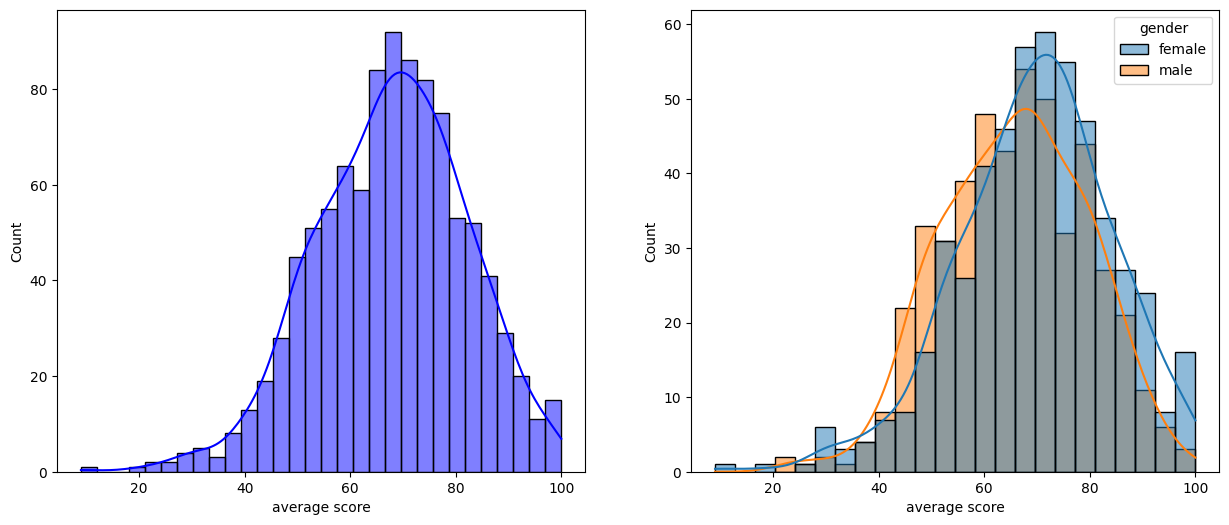

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
plt.subplot(121)
sns.histplot(data=df,x='average score', bins=30, kde=True,color = 'blue')
plt.subplot(122)
sns.histplot(data=df,x='average score', kde=True,hue = 'gender')
plt.show()

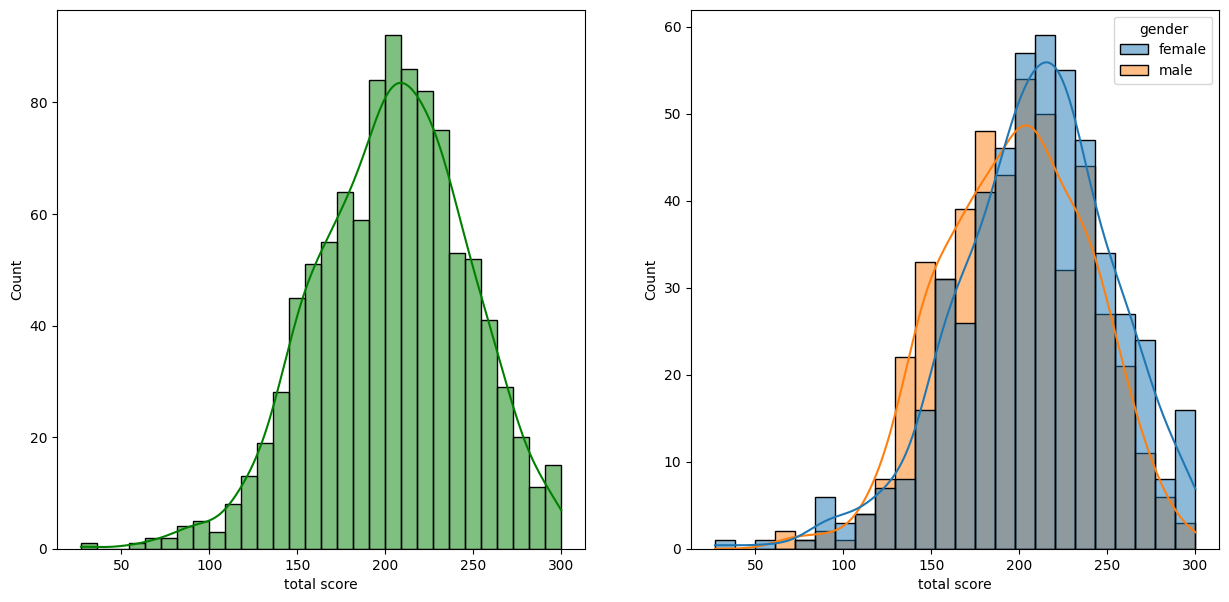

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

<h3>Insights</h3>
<h4>Female students tend to perform well then male students</h4>

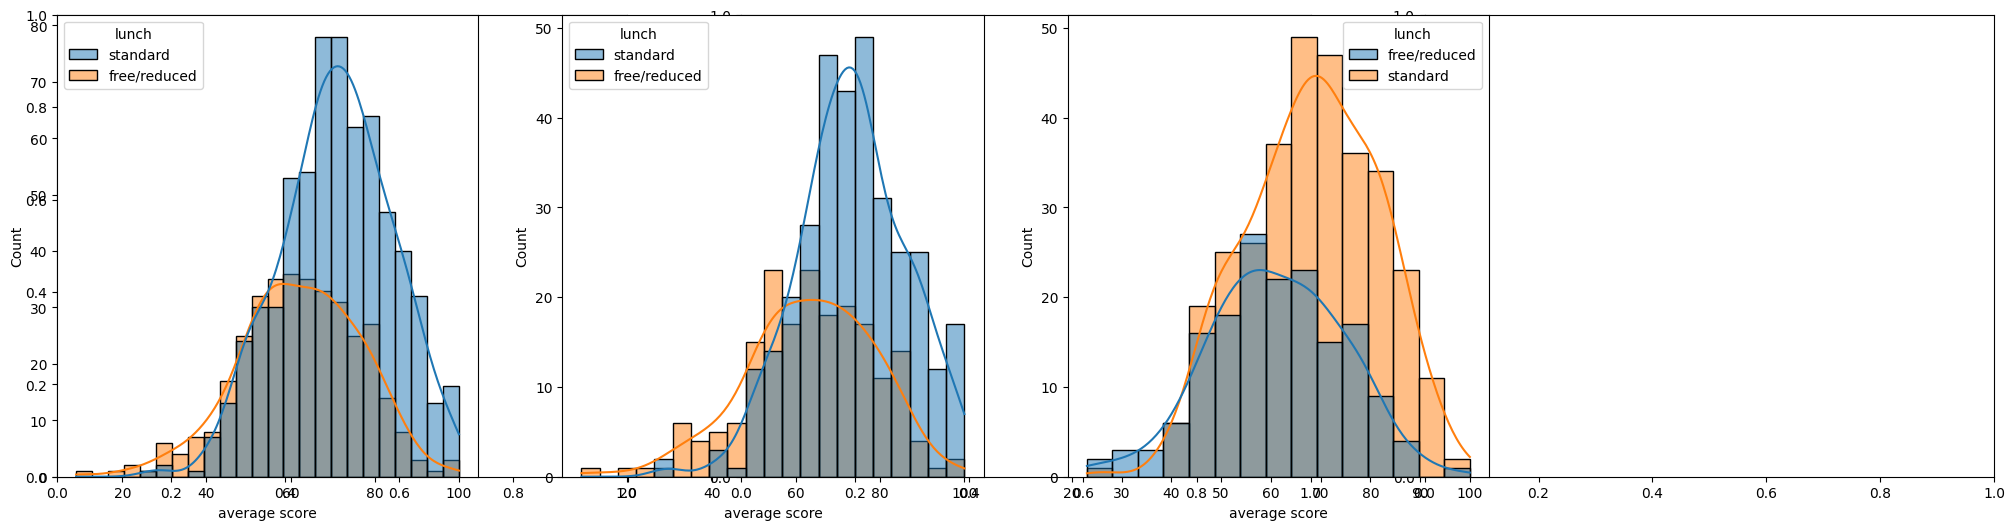

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

<h3>Insights</h3>

<h4>1-Standard lunch helps perform well in exams.<br>
2-Standard lunch helps perform well in exams be it a male or a female</h4>

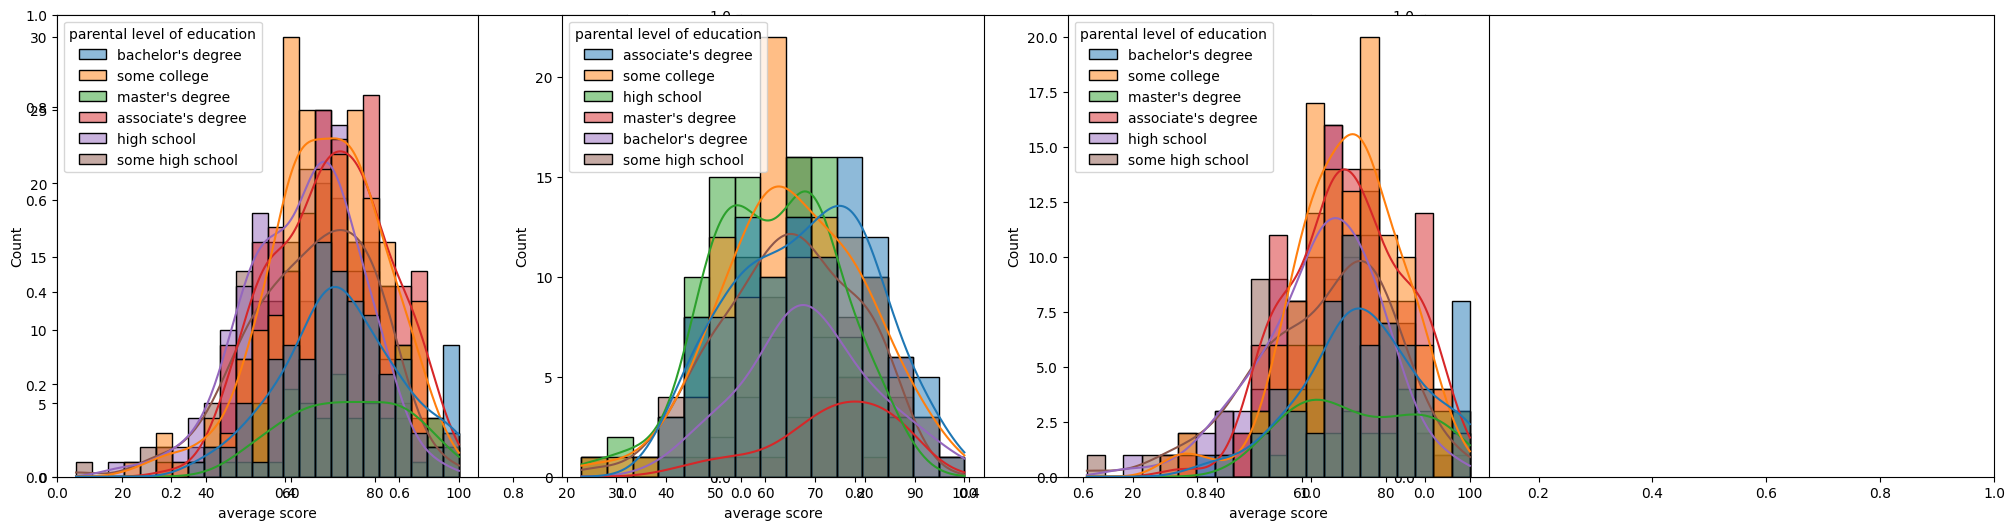

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.show()


<h3>Insights</h3>

<h4>1st plot-In general parent's education don't help student perform well in exam.<br>
    2nd plot- shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam<br>
    3rd plot- we can see there is no effect of parent's education on female students.</h4>



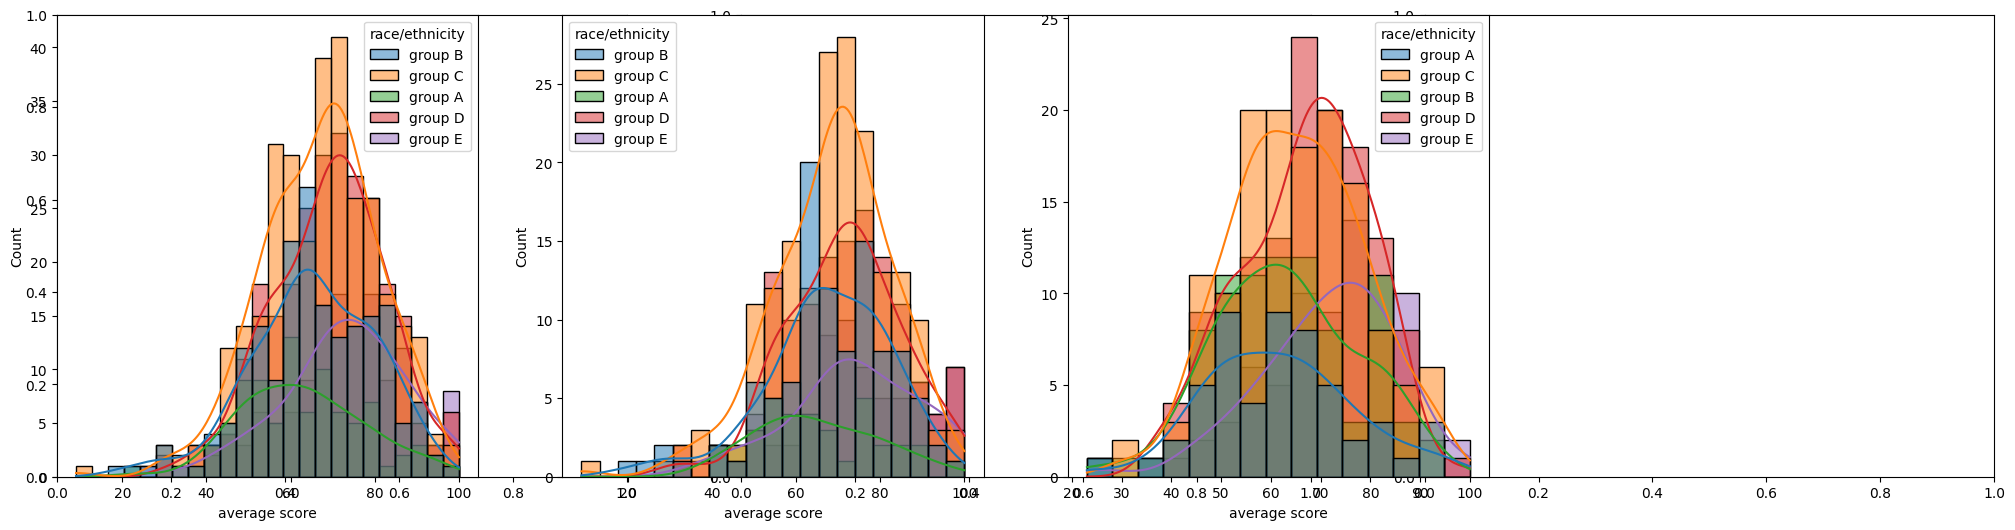

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()


<h3>Insights</h3>

<h4>1-Students of group A and group B tends to perform poorly in exam.<br>
    2-Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.</h4>



<h3>4.2 Maximum score of students in all three subjects</h3>

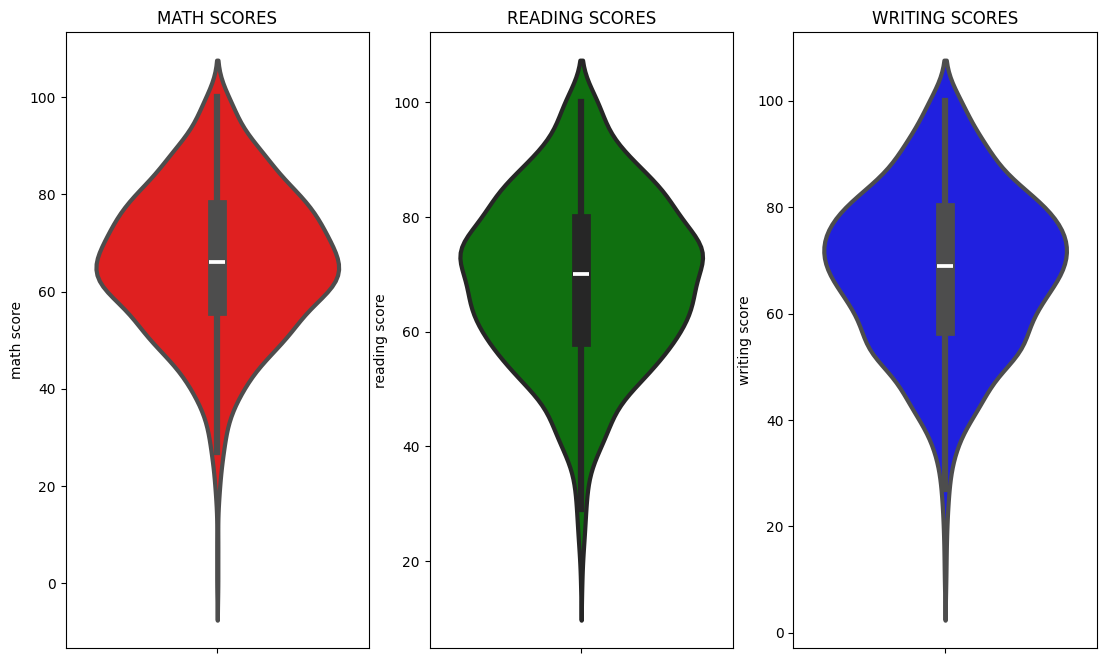

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()




<h4>Insights</h4>

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80



<h3>4.3 Multivariate analysis using pieplot</h3>

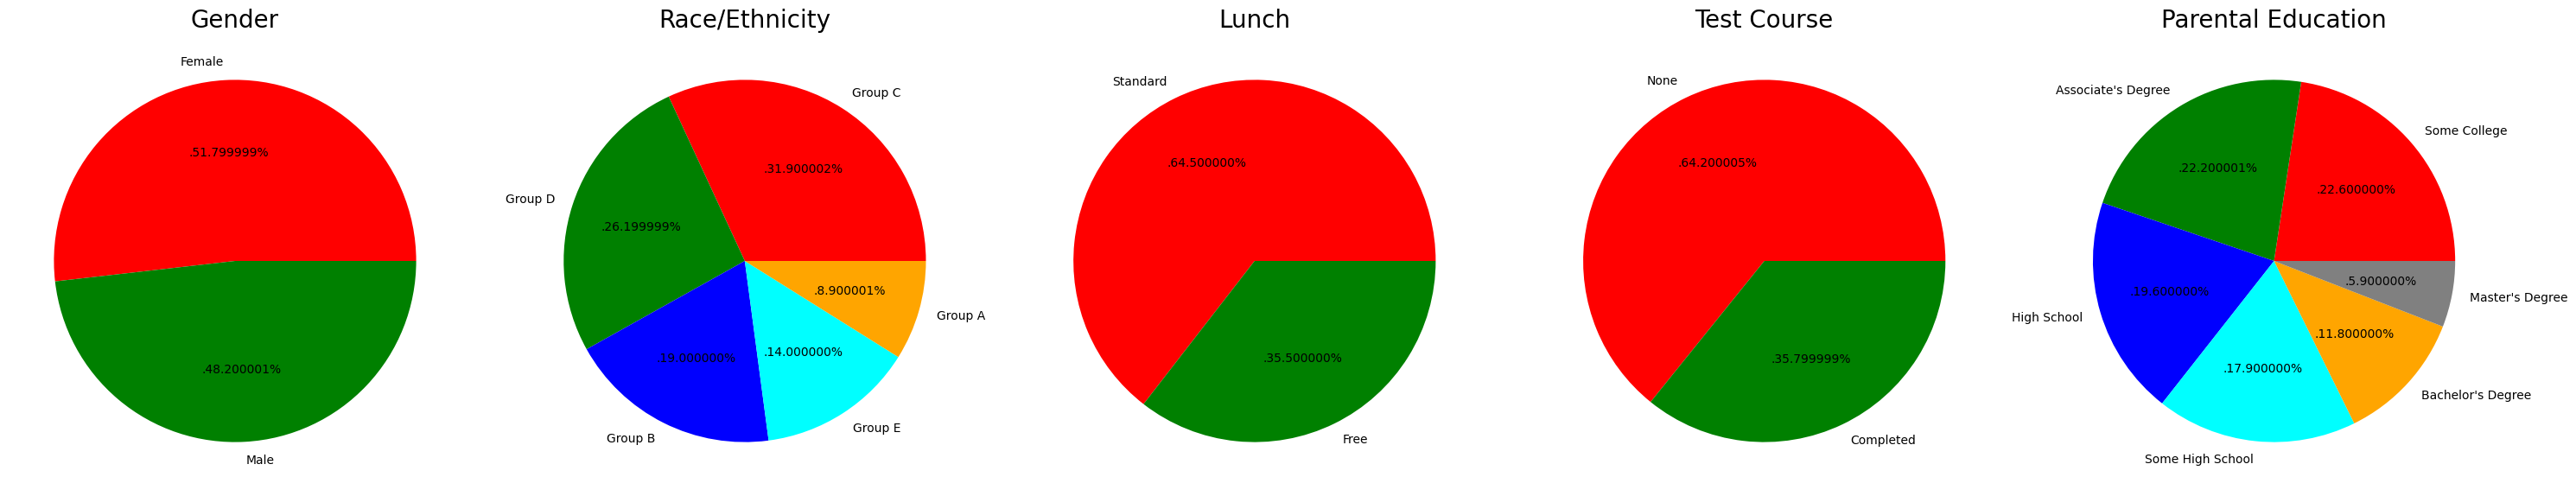

In [28]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


<h3>Insights</h3>

<h4>1-Number of Male and Female students is almost equal<br>
    2-Number students are greatest in Group C<br>
    3-Number of students who have standard lunch are greater<br>
    4-Number of students who have not enrolled in any test preparation course is greater<br>
    5-Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"<br>

<h3>4.4 Feature Wise Visualization</h3>
<h3>4.4.1 GENDER COLUMN</h3>

   <h4> How is distribution of Gender ?<br>
    Is gender has any impact on student's performance ?</h4>

<h3>UNIVARIATE ANALYSIS ( How is distribution of Gender ? )</h3>

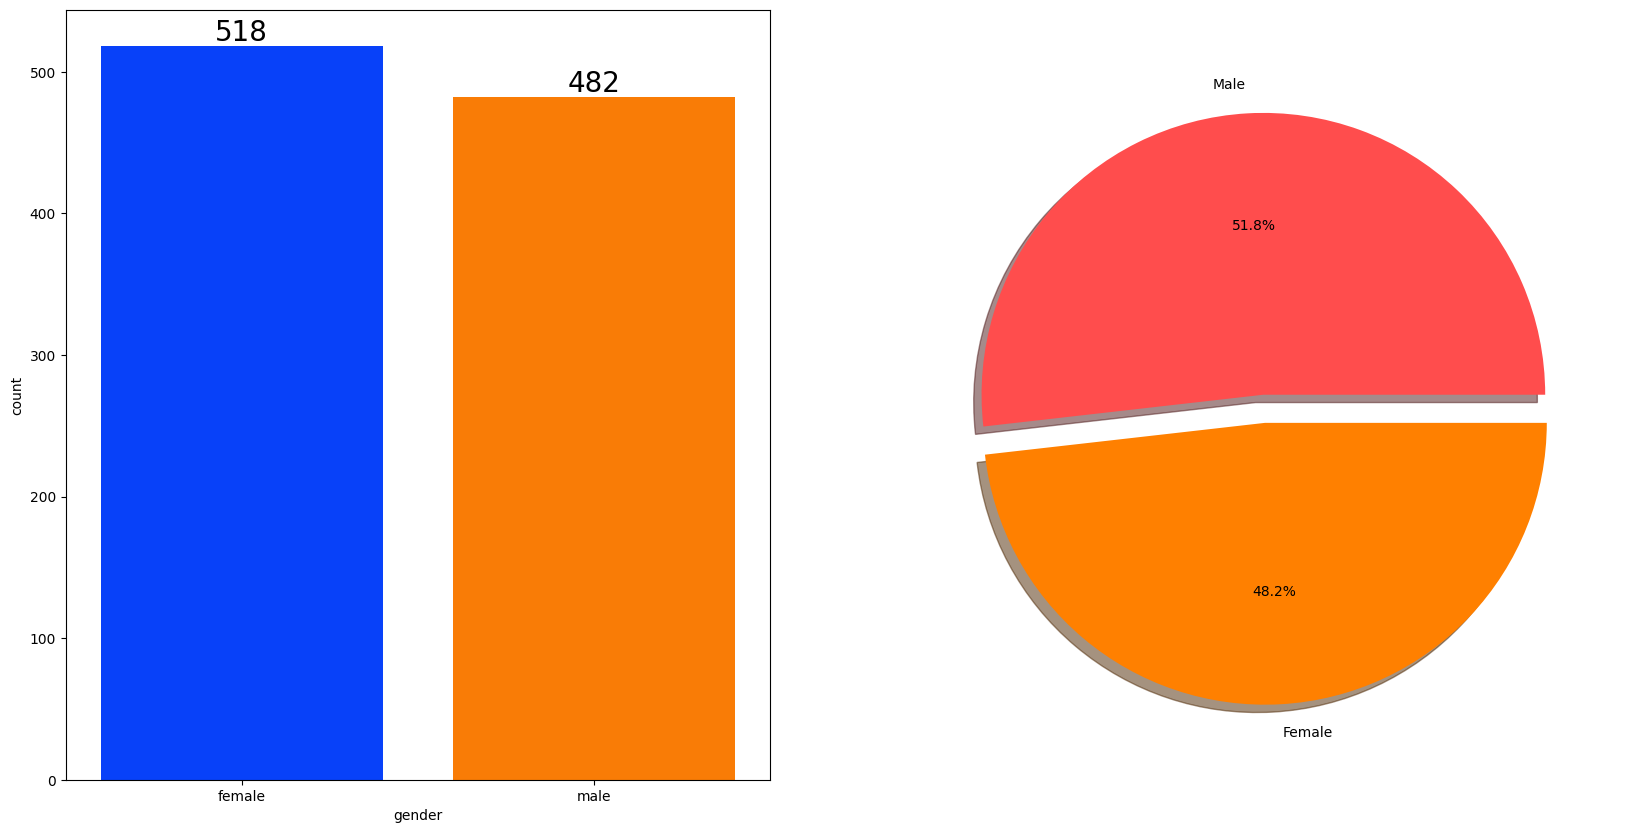

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


<h3>Insights</h3>
Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)



<h3>BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )</h3>

In [ ]:
# Select numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=[np.number])

# Now group by 'gender' using the numeric subset of the DataFrame
gender_group = df[['gender']].join(numeric_cols).groupby('gender').mean()
print(gender_group)


        math score  reading score  writing score  total score  average score
gender                                                                      
female   63.633205      72.608108      72.467181   208.708494      69.569498
male     68.728216      65.473029      63.311203   197.512448      65.837483


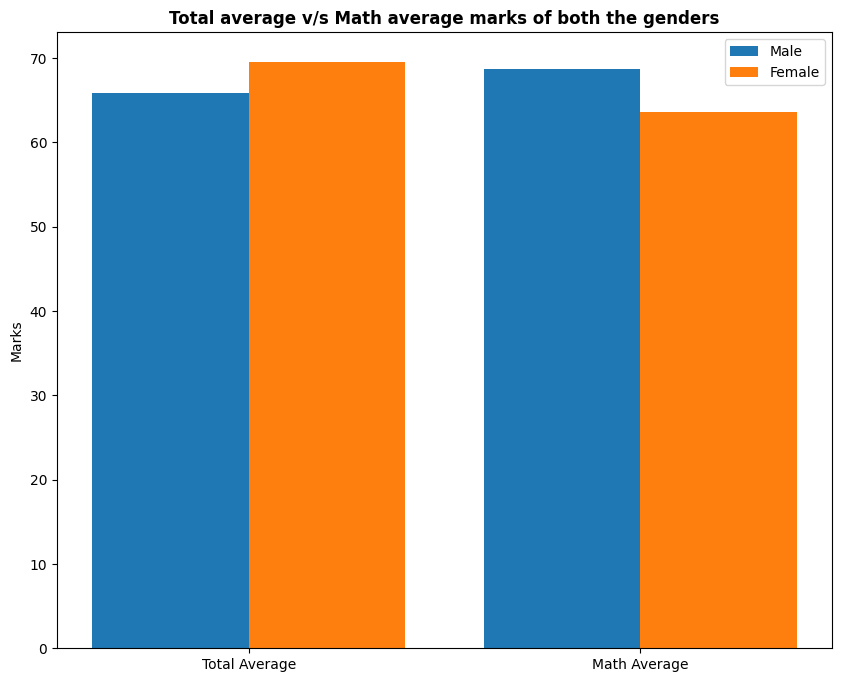

In [35]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


<h3>Insights</h3>

<h3>On an average females have a better overall score than men.<br>
    whereas males have scored higher in Maths.</h3>

<h3>4.4.2 RACE/EHNICITY COLUMN</h3>

   <h4> How is Group wise distribution ?<br>
    Is Race/Ehnicity has any impact on student's performance ?</h3>

<h3>UNIVARIATE ANALYSIS ( How is Group wise distribution ?)<h3>

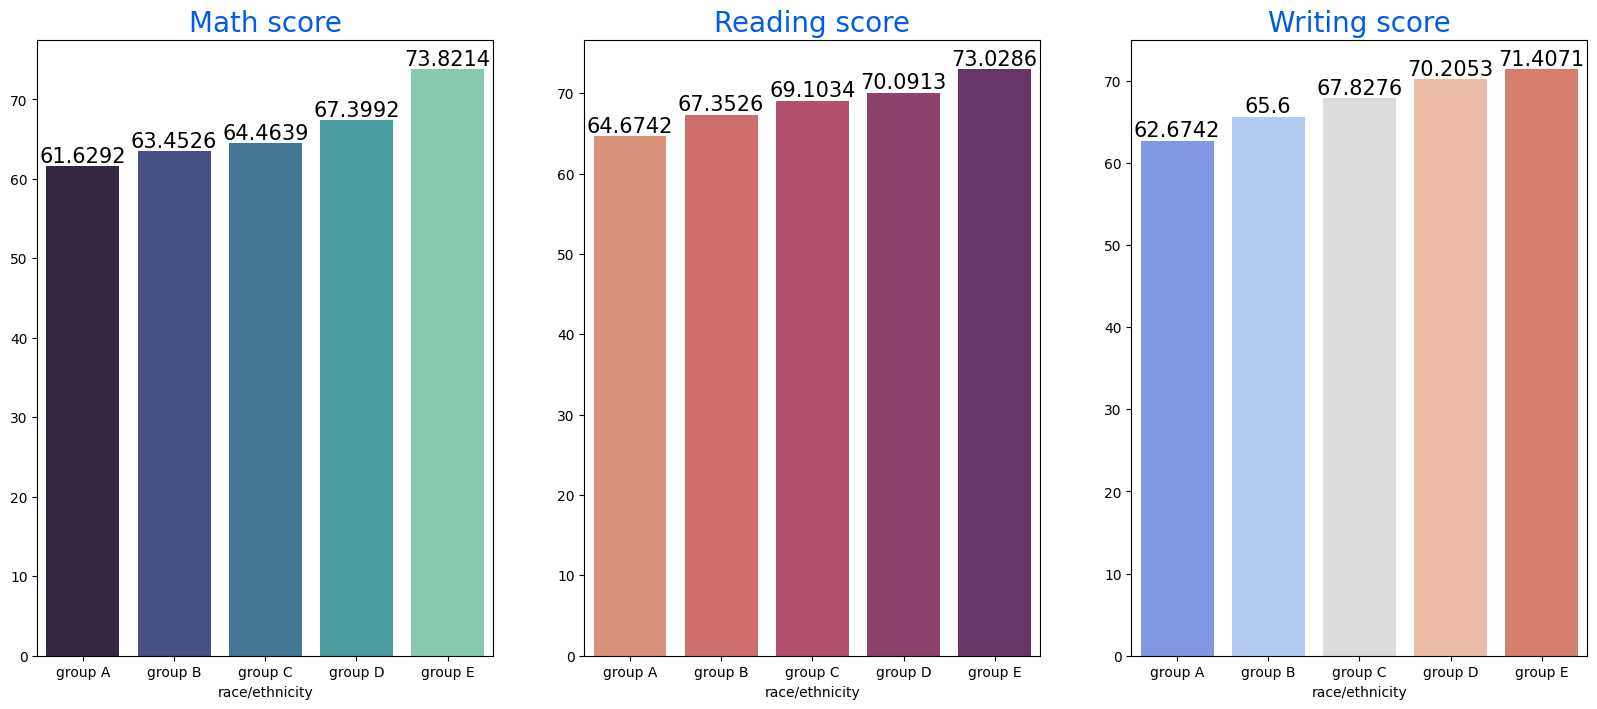

In [5]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


<h3>Insights</h3>

 <h4>Group E students have scored the highest marks.<br>
    Group A students have scored the lowest marks.<br>
    Students from a lower Socioeconomic status have a lower avg in all course subjects</h4>

<h3>4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN</h3>

   <h4> What is educational background of student's parent ?<br>
    Is parental education has any impact on student's performance ?</h4>

<h3>UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )</h3>

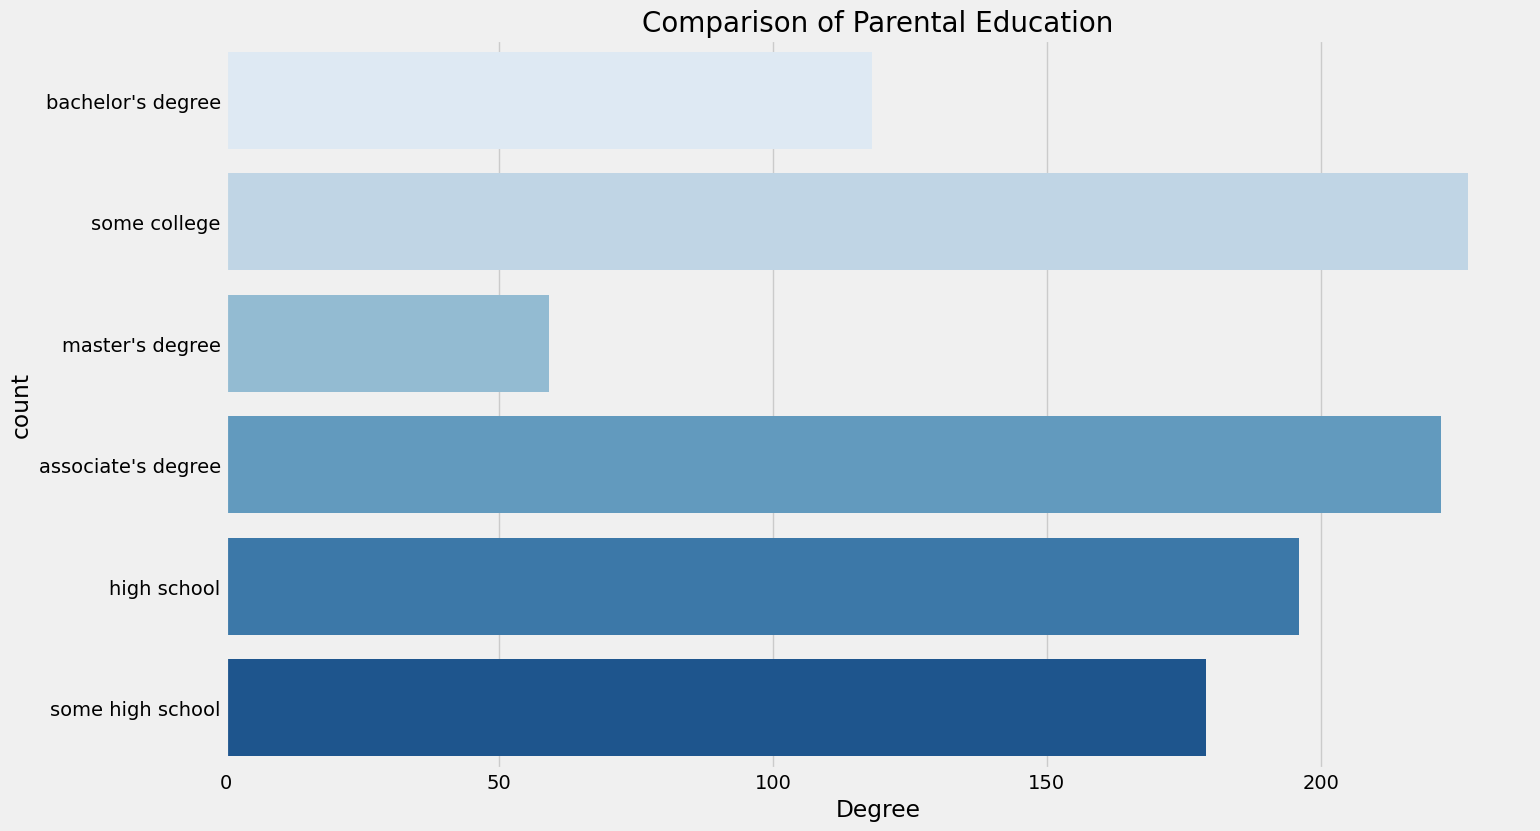

In [6]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()


<h3>Insights</h3>

<h4>Largest number of parents are from some college.</h4>

<h3>BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )</h3>

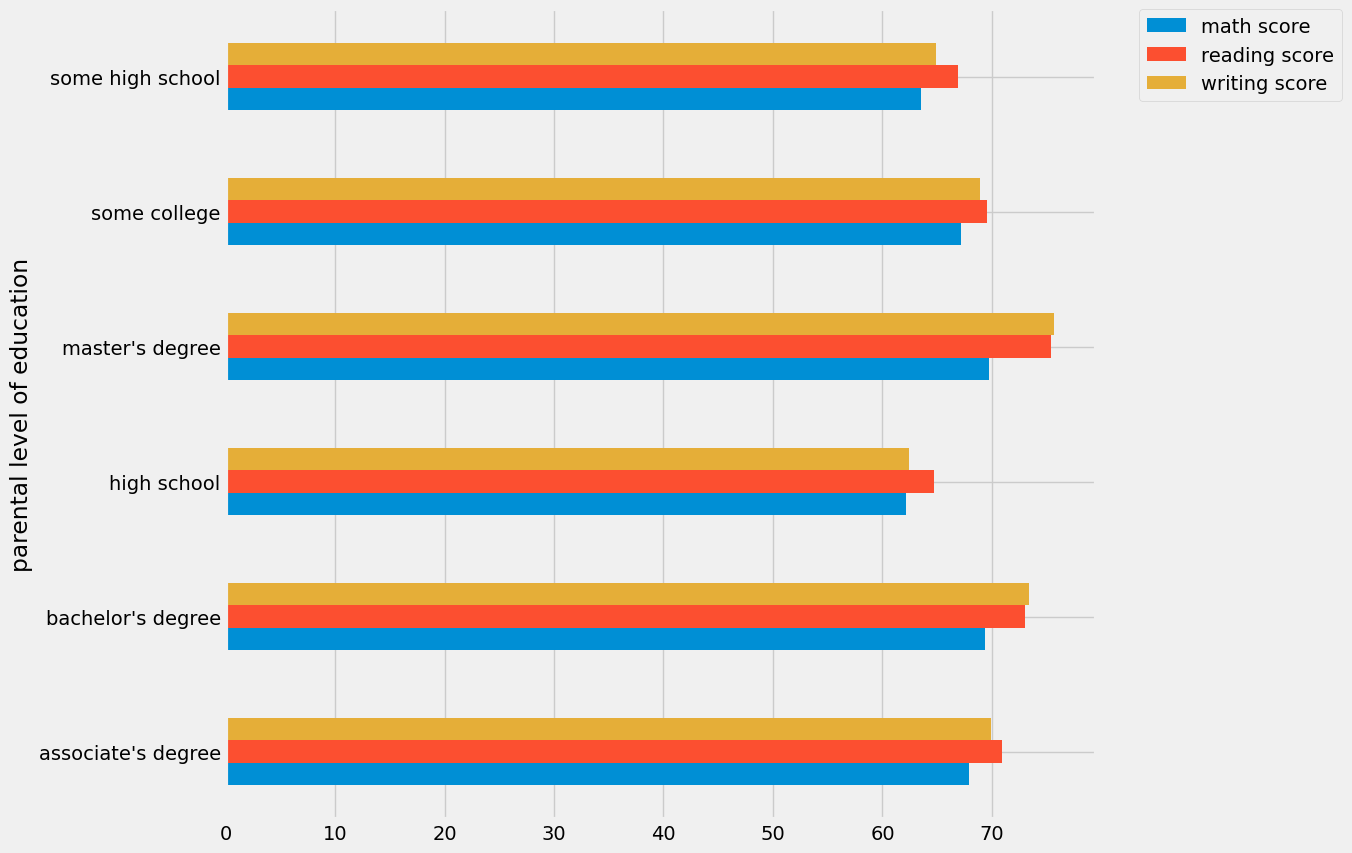

In [ ]:
df.groupby('parental level of education')[df.select_dtypes(include='number').columns].mean().plot(
    kind='barh',
    figsize=(10, 10)
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



<h3>Insights</h3>

  <h4>  The score of student whose parents possess master and bachelor level education are higher than others.</h4>

<h3>4.4.4 LUNCH COLUMN</h3>

   <h4> Which type of lunch is most common amoung students ?<br>
    What is the effect of lunch type on test results?</h4>

<h3>UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )</h3>

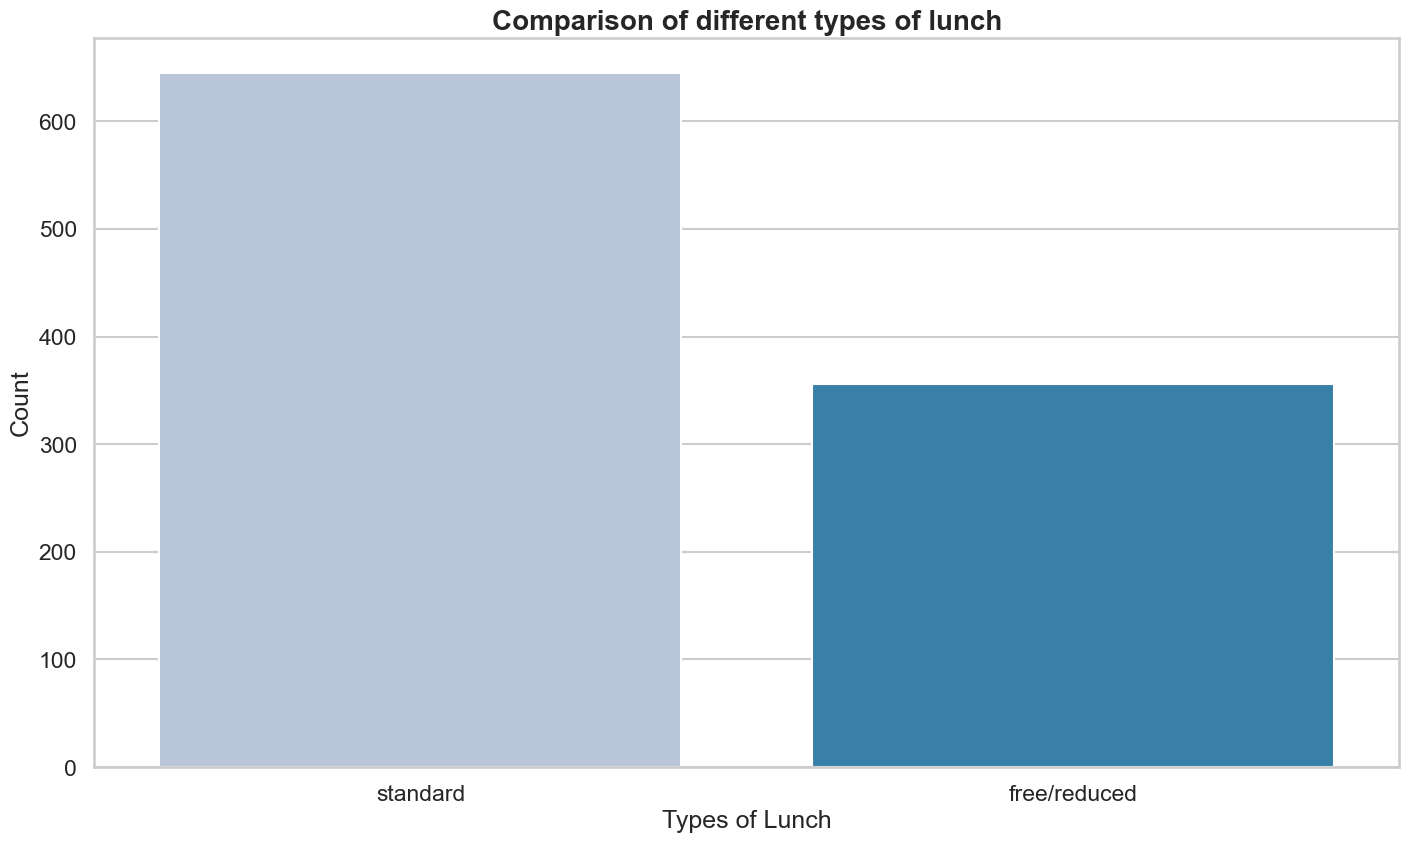

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_theme(style='whitegrid')
sns.set_context('talk')       
sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()


<h3>Insights</h3>

   <h4> Students being served Standard lunch was more than free lunch</h4>


<h3>BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )</h3>

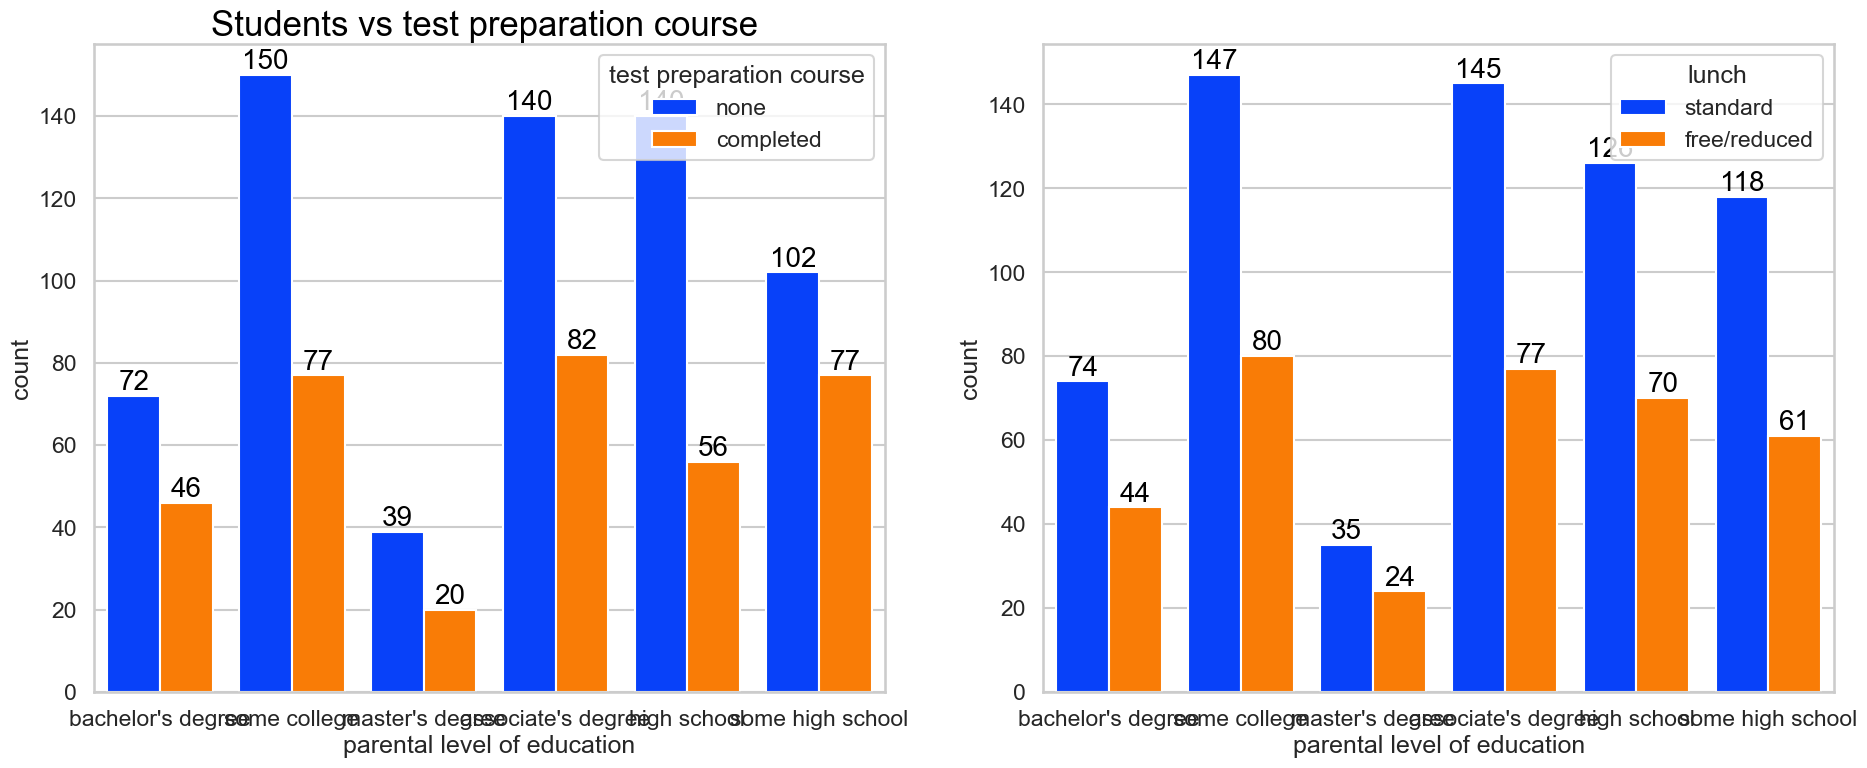

In [12]:


f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   




<h3>Insights</h3>

 <h4>   Students who get Standard Lunch tend to perform better than students who got free/reduced lunch<h4>

<h3>4.4.5 TEST PREPARATION COURSE COLUMN</h3>

  <h4>  Which type of lunch is most common amoung students ?<br>
    Is Test prepration course has any impact on student's performance ?</h4>

<h3>BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )</h3>

<Axes: xlabel='lunch', ylabel='writing score'>

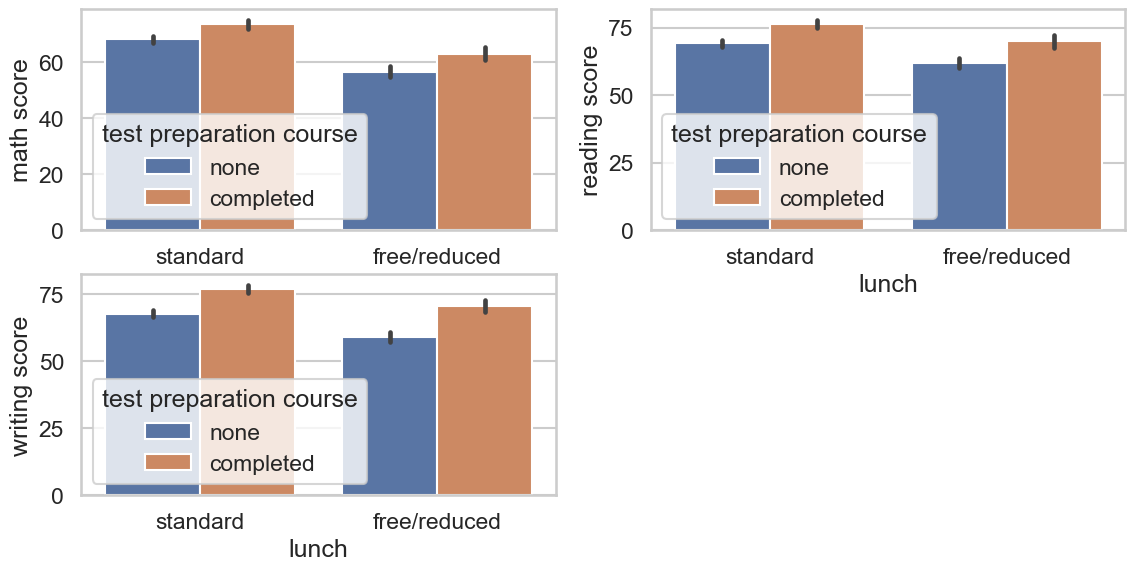

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])


<h3>Insights</h3>

   <h4> Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course</h4>

<h3>4.4.6 CHECKING OUTLIERS</h3>

KeyError: 'average score'

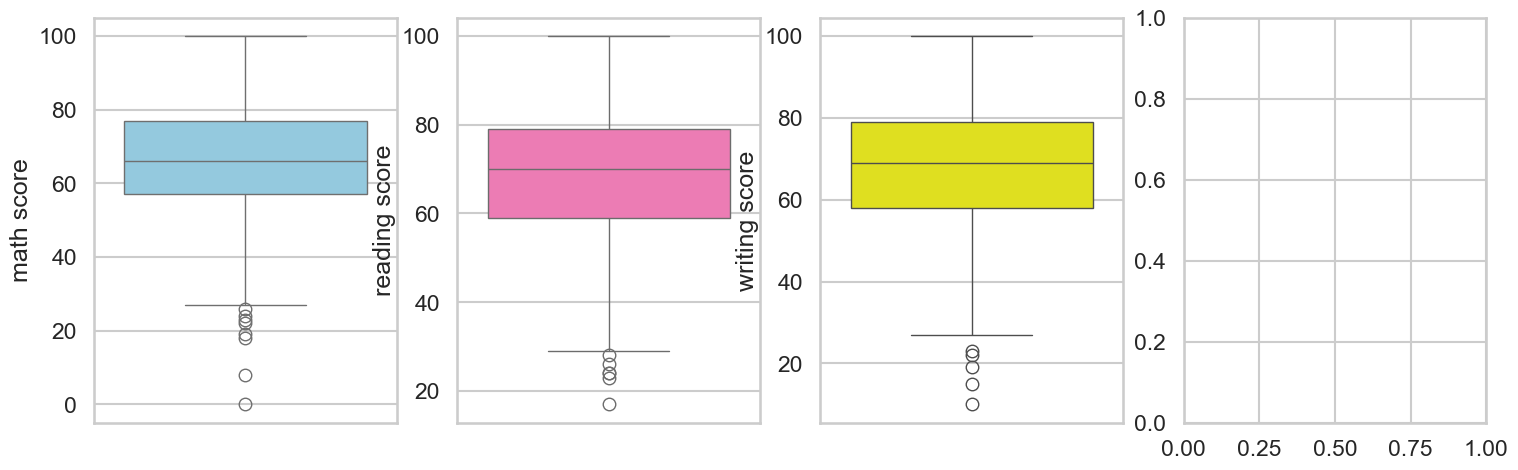

In [15]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

<h3>4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT</h3>

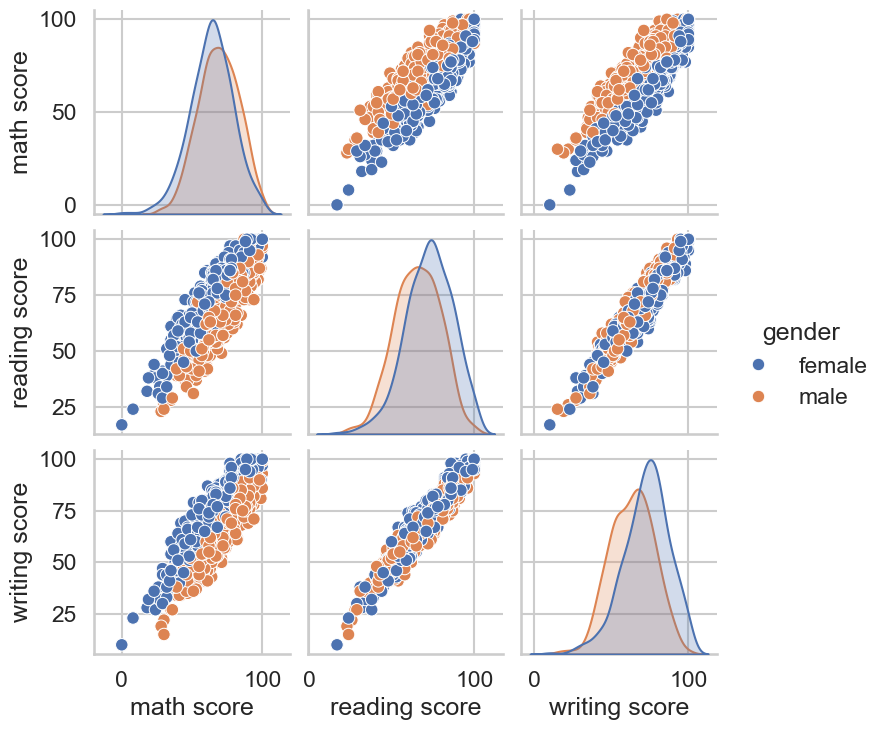

In [17]:
sns.pairplot(df,hue = 'gender')
plt.show()


<h3>Insights</h3>

  <h4>  From the above plot it is clear that all the scores increase linearly with each other.</h4>
<h3>
5. Conclusions</h3>

  <h4>1-Student's Performance is related with lunch, race, parental level education<br>
    2-Females lead in pass percentage and also are top-scorers<br>
    3-Student's Performance is not much related with test preparation course<br>
    4-Finishing preparation course is benefitial.</h4>

